In [1]:
%load_ext autoreload

In [1]:
import torch
from rambo_generator import FlatInvertiblePhasespace
#from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from utils import *
torch.set_default_dtype(torch.double)

In [2]:
import sys
sys.path.append("/home/valsdav/code/MEM/LHAPDF-6.5.3_install/lib/python3.9/site-packages")
import lhapdf
pdf = lhapdf.mkPDF("NNPDF40_nnlo_hessian_pdfas",0)

LHAPDF 6.5.3 loading /opt/LHAPDF/share/LHAPDF/NNPDF40_nnlo_hessian_pdfas/NNPDF40_nnlo_hessian_pdfas_0000.dat
NNPDF40_nnlo_hessian_pdfas PDF set, member #0, version 1; LHAPDF ID = 331600


In [3]:
TOP_MASS = 172.76
HIGGS_MASS = 125.25
E_CM = 13000
final_masses = torch.tensor([HIGGS_MASS, TOP_MASS, TOP_MASS], requires_grad=False)

In [4]:
gen = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=False, tau=False)
gen_tau = FlatInvertiblePhasespace([0.,0.],[HIGGS_MASS, TOP_MASS, TOP_MASS], 
                                   pdf=pdf, pdf_active=False, tau=True)

In [5]:
gen.nDimPhaseSpace()

5

In [6]:
FlatInvertiblePhasespace.get_flatWeights(13000, 3)

21291.052028166854

generateKinematics_batch(self, E_cm, random_variables_full, pT_mincut=-1, delR_mincut=-1, rap_maxcut=-1,pdgs=[0,0]):

In [5]:
r_initial = torch.rand(1000, 5)

In [6]:
p, w, x1, x2, M_gen, K_T = gen.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])
p_tau, w_tau, *others = gen_tau.generateKinematics_batch(E_CM, r_initial, pdgs=[21,21])

## Debugging plots

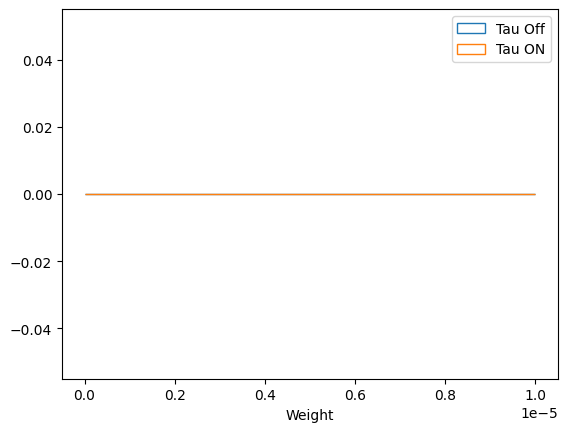

In [208]:
plt.hist(w, bins=100,range=(0,1e-5),histtype="step", label="Tau Off")
plt.hist(w_tau, bins=100, range=(0,1e-5), histtype="step", label="Tau ON")
#plt.yscale("log")
plt.xlabel("Weight")
plt.legend()

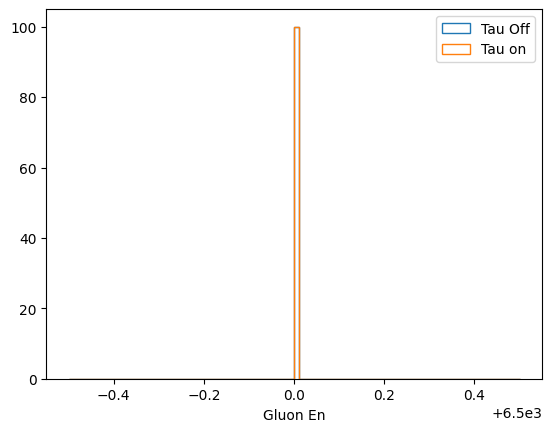

In [209]:
plt.hist(p[:,0,0], bins=100, density=True, histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], bins=100, density=True, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.legend()

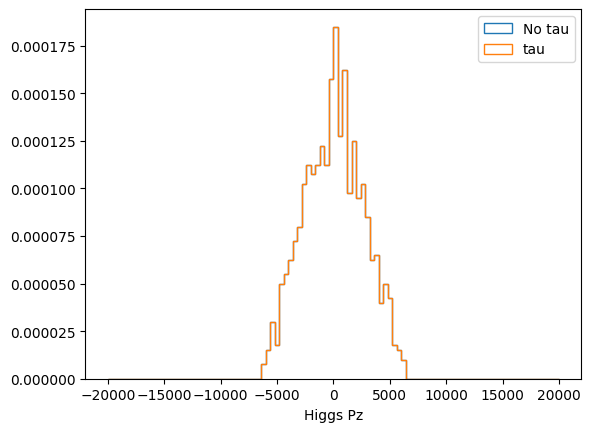

In [210]:
plt.hist(p[:,2,3], bins=100, range=(-20000,20000), density=True, histtype="step", label="No tau")
plt.hist(p_tau[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
#plt.hist(p_lab[:,2,3], bins=100,range=(-20000,20000),  density=True, histtype="step", label="tau")
plt.xlabel("Higgs Pz")
plt.legend()

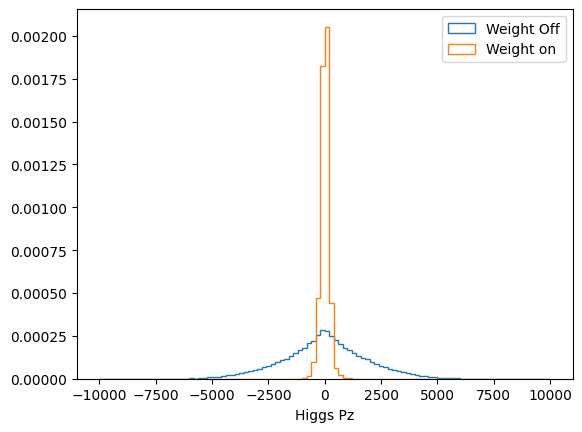

In [28]:
plt.hist(p_tau[:,2,3], bins=100, range=(-10000,10000), density=True, histtype="step", label="Weight Off")
plt.hist(p_tau[:,2,3], weights=w_tau, bins=100,range=(-10000,10000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

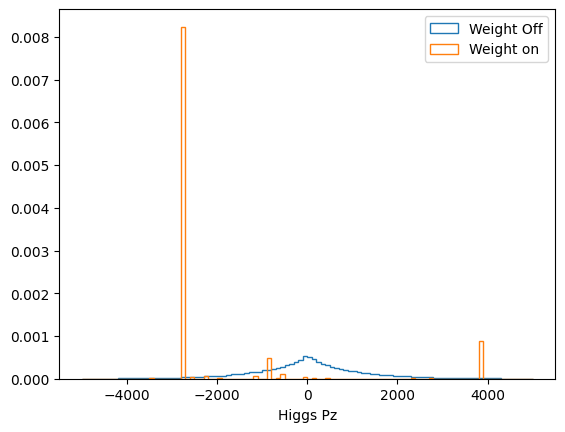

In [29]:
plt.hist(p[:,2,3], bins=100, range=(-5000,5000), density=True, histtype="step", label="Weight Off")
plt.hist(p[:,2,3], weights=w, bins=100,range=(-5000,5000),  density=True, histtype="step", label="Weight on")
plt.xlabel("Higgs Pz")
plt.legend()

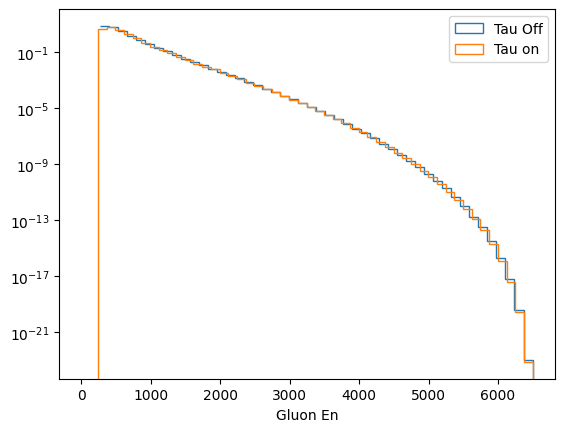

In [46]:
plt.hist(p[:,0,0], weights=w, bins=50,  histtype="step", label="Tau Off")
plt.hist(p_tau[:,0,0], weights=w_tau, bins=50, histtype="step", label="Tau on")
plt.xlabel("Gluon En")
plt.yscale("log")
plt.legend()

Text(0.5, 0, 'Pz')

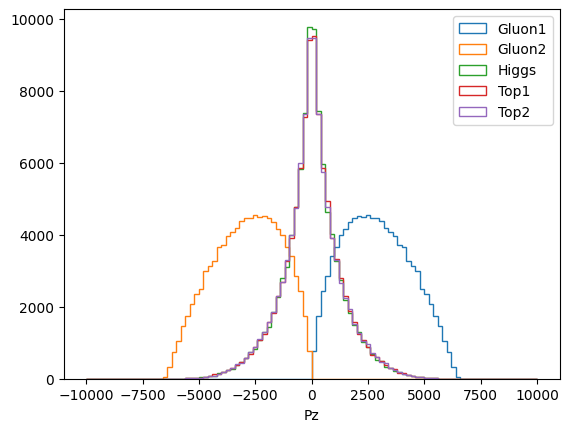

In [49]:
plt.hist(p[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'En')

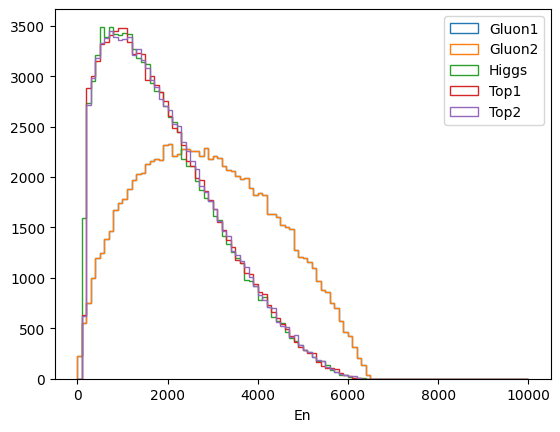

In [51]:
plt.hist(p[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(p[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("En")

Text(0.5, 0, 'Px')

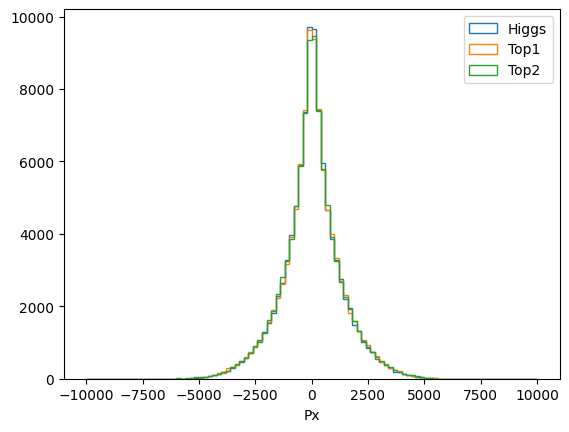

In [54]:
#plt.hist(p[:,0,1], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
#plt.hist(p[:,1,1], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(p[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(p[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(p[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

In [168]:
H_phi = torch.atan(p[:,2, 3]/ p[:,2,2])

(array([ 9., 11.,  8.,  3., 12.,  7., 14., 13.,  7., 12., 15.,  8., 12.,
        12., 10., 13.,  9., 10.,  3., 11., 10., 13., 11., 10., 12., 12.,
        15.,  9., 14.,  7., 10., 15., 15., 10., 13.,  7., 13.,  9., 19.,
         9., 11.,  7.,  2., 12.,  8.,  9.,  7., 17.,  4., 10., 10., 11.,
         8., 18., 10., 11.,  9.,  6., 10.,  3.,  5.,  5.,  9.,  9.,  5.,
        13., 10., 11.,  8.,  9.,  9.,  2., 12., 10.,  7.,  7.,  6.,  8.,
        12., 12., 13., 11., 11., 17., 11., 11.,  9.,  9.,  9.,  2., 13.,
         9., 15., 14., 11.,  7.,  9.,  6., 11., 15.]),
 array([-1.56928791e+00, -1.53791207e+00, -1.50653622e+00, -1.47516037e+00,
        -1.44378453e+00, -1.41240868e+00, -1.38103283e+00, -1.34965698e+00,
        -1.31828114e+00, -1.28690529e+00, -1.25552944e+00, -1.22415359e+00,
        -1.19277775e+00, -1.16140190e+00, -1.13002605e+00, -1.09865020e+00,
        -1.06727436e+00, -1.03589851e+00, -1.00452266e+00, -9.73146815e-01,
        -9.41770968e-01, -9.10395121e-01, -8.79019273e

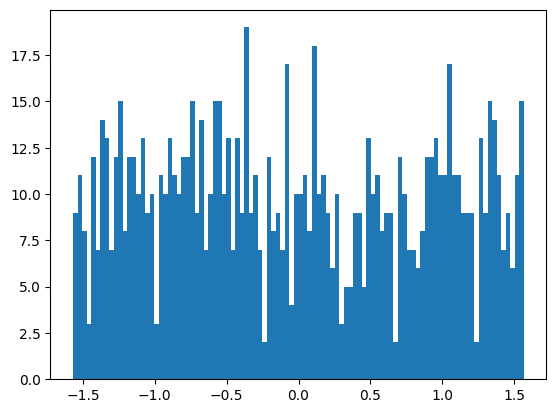

In [170]:
plt.hist(H_phi, bins=100)

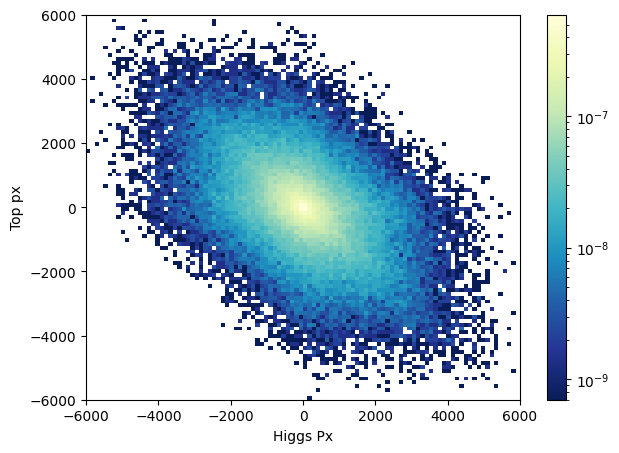

In [55]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(), range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

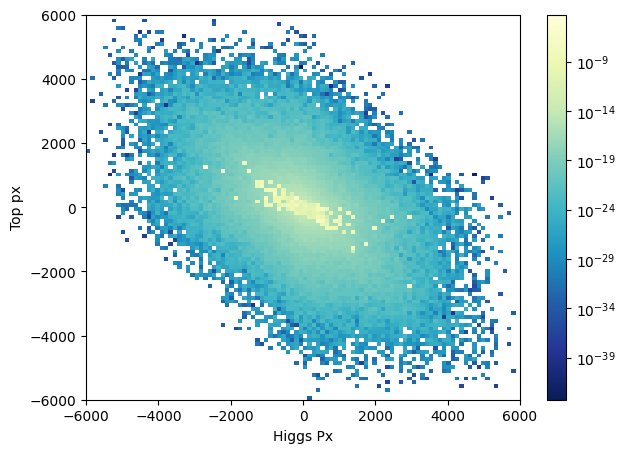

In [56]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,1].numpy(),p[:,3,1].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Px")
plt.ylabel("Top px")
plt.colorbar()

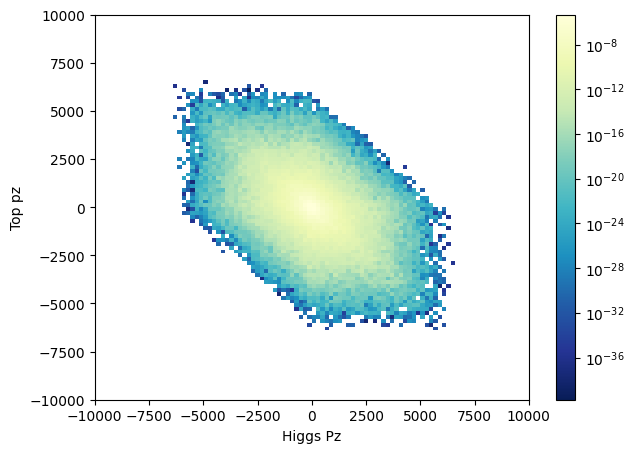

In [57]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,3,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

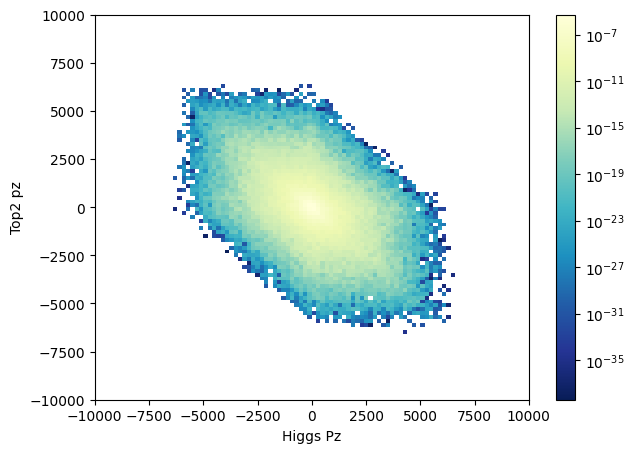

In [58]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,2,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

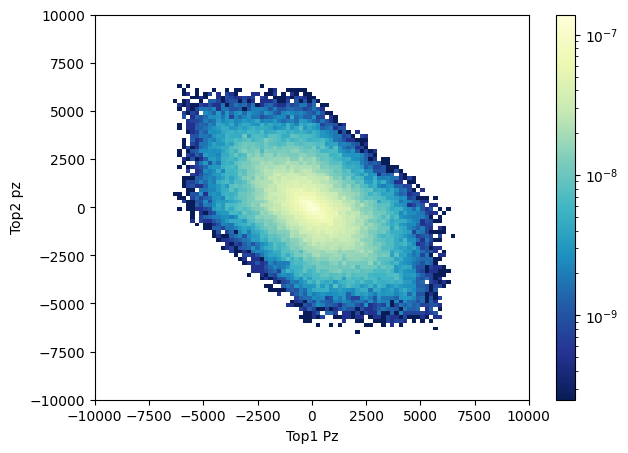

In [59]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

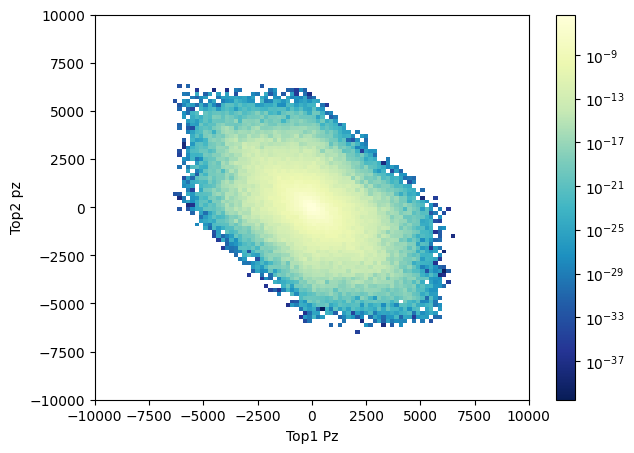

In [60]:
plt.figure(figsize=(7,5))
plt.hist2d(p_tau[:,3,3].numpy(),p_tau[:,4,3].numpy(),
           weights= w_tau, range=((-10000,10000),(-10000,10000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

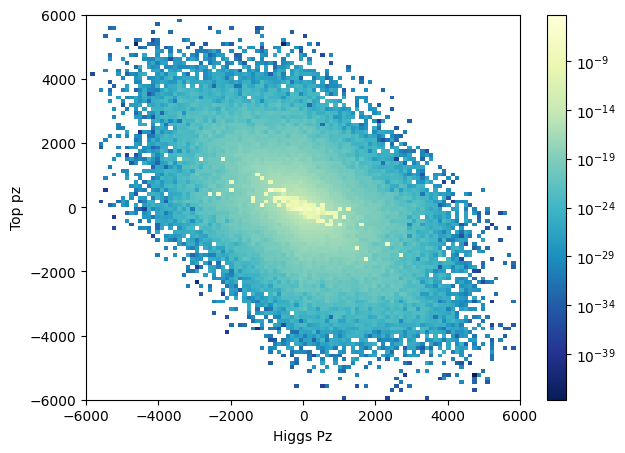

In [61]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,2,3].numpy(),p[:,3,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Higgs Pz")
plt.ylabel("Top pz")
plt.colorbar()

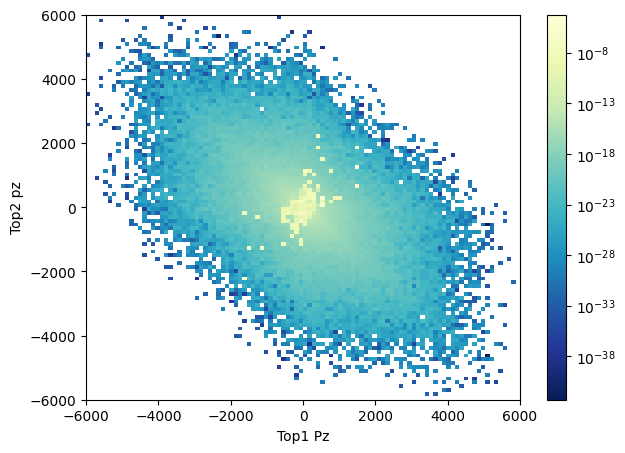

In [62]:
plt.figure(figsize=(7,5))
plt.hist2d(p[:,3,3].numpy(),p[:,4,3].numpy(),
           weights= w, range=((-6000,6000),(-6000,6000)), 
           bins=100, density=True, cmap="YlGnBu_r", norm=colors.LogNorm())
plt.xlabel("Top1 Pz")
plt.ylabel("Top2 pz")
plt.colorbar()

# Inverse transformation

In [64]:
from utils import *

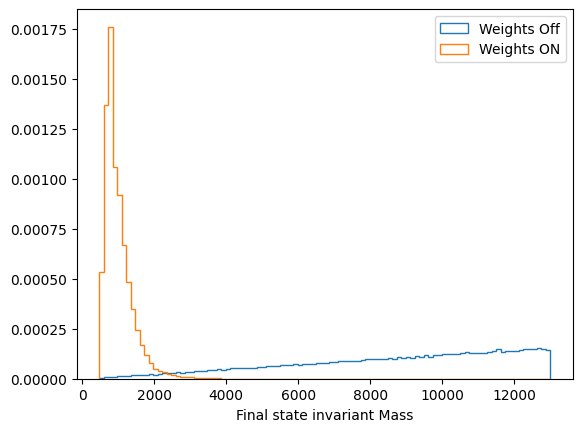

In [67]:
Mfinal =  torch.sqrt(square_t(torch.sum(p_tau[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
plt.hist(Mfinal, weights=w_tau, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()

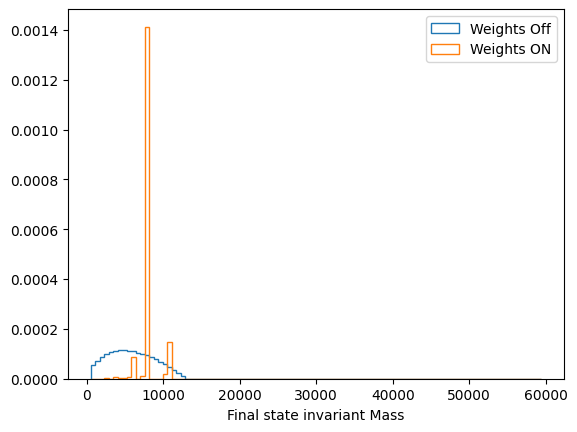

In [68]:
Mfinal =  torch.sqrt(square_t(torch.sum(p[:,2:], axis=1)))
plt.hist(Mfinal, bins=100, density=True, histtype="step", label="Weights Off")
plt.hist(Mfinal, weights=w, bins=100, density=True, histtype="step", label="Weights ON")
plt.xlabel("Final state invariant Mass")
plt.legend()

In [21]:
n = 3
P = p[:,2:].clone() # copy
M = torch.tensor([0.]*n,requires_grad=False, dtype=torch.double, device=P.device)
M = torch.unsqueeze(M, 0).repeat(P.shape[0],1)
Q = torch.zeros_like(P)
Q[:,-1] = P[:,-1]  # Qn = pn
#M[:, -1] = torch.sqrt(square_t(P[:, -1], axis=1)))
# intermediate mass
for i in range(n, 0, -1):
    j = i-1
    M[:, j] = torch.sqrt(square_t(torch.sum(P[:, j:n], axis=1)))
    # Rimuovere la massa delle particelle finali
    M[:, j] -= torch.sum(final_masses[j:])

r = torch.zeros(P.shape[0], 5)

In [19]:
M

tensor([[ 1.2529e+04,  9.9444e+03, -8.0149e-12],
        [ 1.2529e+04,  3.3164e+03,  5.1159e-12],
        [ 1.2529e+04,  6.3955e+03,  1.5916e-12],
        ...,
        [ 1.2529e+04,  7.4759e+03, -2.5580e-13],
        [ 1.2529e+04,  7.4661e+03, -1.2903e-11],
        [ 1.2529e+04,  3.2602e+03,  5.1159e-12]])

In [14]:
M_gen

tensor([[13000.0000, 10289.8793,   172.7600],
        [13000.0000,  3661.9401,   172.7600],
        [13000.0000,  6740.9941,   172.7600],
        ...,
        [13000.0000,  7821.4048,   172.7600],
        [13000.0000,  7811.6199,   172.7600],
        [13000.0000,  3605.6706,   172.7600]])

In [15]:
K_T

tensor([[12529.2300,  9944.3593],
        [12529.2300,  3316.4201],
        [12529.2300,  6395.4741],
        ...,
        [12529.2300,  7475.8848],
        [12529.2300,  7466.0999],
        [12529.2300,  3260.1506]])

In [22]:
for i in range(n, 1, -1):
    j = i-1 #index for 0-based tensors
    print(i, j)
    #M[:, j] = torch.sqrt(square_t(torch.sum(P[:, j:n], axis=1)))
    
    u = M[:, j]/M[:, j-1]
    print(M[0:3, j], M[0:3, j-1], u[0:3])
    
    
    #print(u[0:5])
    r[:, j-1] = (n+1-i)*(torch.pow(u,(n-i))) - (n-i)*(torch.pow(u,(n+1-i)))
    #2* u  + u**2
    
    Q[:, j-1] = Q[:, j] + P[:, j-1]
    #print(Q[0:5,:])
    boost_t(P[:, j-1], -boostVector_t(Q[:, j-1]))
   
    r[:, n-5+2*i-1] = ((P[:, j-1, 3]/ torch.sqrt(rho2_t(P[:, j-1]))) + 1)/2
    phi = torch.atan(P[:, j-1, 2]/P[:, j-1, 1])
    # Fixing phi depending on X and y sign
    # 4th quandrant  (px > 0, py < 0)
    deltaphi = torch.where((P[:, j-1, 2]<0)&(P[:, j-1, 1]>0), 2*torch.pi, 0.)
    # 2th and 3th quadratant  (px < 0, py whatever)
    deltaphi += torch.where((P[:, j-1, 1]<0), torch.pi, 0.)
    phi += deltaphi
    r[:, n-4+2*i-1] = phi/(2*torch.pi)
    print(j-1, n-5+2*i-1, n-4+2*i-1)
    print(r[0:5])
    

3 2
tensor([-8.0149e-12,  5.1159e-12,  1.5916e-12]) tensor([9944.3593, 3316.4201, 6395.4741]) tensor([-8.0598e-16,  1.5426e-15,  2.4887e-16])
1 3 4
tensor([[0.0000, 1.0000, 0.0000, 0.4645, 0.0567],
        [0.0000, 1.0000, 0.0000, 0.0909, 0.8465],
        [0.0000, 1.0000, 0.0000, 0.8207, 0.6340],
        [0.0000, 1.0000, 0.0000, 0.3247, 0.1537],
        [0.0000, 1.0000, 0.0000, 0.0334, 0.9256]])
2 1
tensor([9944.3593, 3316.4201, 6395.4741]) tensor([12529.2300, 12529.2300, 12529.2300]) tensor([0.7937, 0.2647, 0.5104])
0 1 2
tensor([[0.9574, 0.3539, 0.0377, 0.4645, 0.0567],
        [0.4593, 0.2857, 0.3279, 0.0909, 0.8465],
        [0.7603, 0.0549, 0.1733, 0.8207, 0.6340],
        [0.9466, 0.8634, 0.1178, 0.3247, 0.1537],
        [0.8295, 0.4787, 0.2843, 0.0334, 0.9256]])


In [23]:
r_initial[0:5, 0:5]

tensor([[0.8631, 0.3539, 0.0377, 0.4645, 0.0567],
        [0.1352, 0.2857, 0.3279, 0.0909, 0.8465],
        [0.4532, 0.0549, 0.1733, 0.8207, 0.6340],
        [0.8328, 0.8634, 0.1178, 0.3247, 0.1537],
        [0.5706, 0.4787, 0.2843, 0.0334, 0.9256]])

In [18]:
r_initial[0:15, 0:5] - r[0:15]

tensor([[-9.4376e-02,  0.0000e+00,  4.1633e-17,  5.5511e-17, -2.7756e-17],
        [-3.2411e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-3.0712e-01,  0.0000e+00,  0.0000e+00,  1.1102e-16,  0.0000e+00],
        [-1.1374e-01,  0.0000e+00, -2.7756e-17,  0.0000e+00,  0.0000e+00],
        [-2.5893e-01,  0.0000e+00,  5.5511e-17,  5.5511e-17, -1.1102e-16],
        [-3.2293e-01,  0.0000e+00,  0.0000e+00,  1.1102e-16,  0.0000e+00],
        [-5.1765e-02, -1.1102e-16,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.7362e-01,  0.0000e+00,  0.0000e+00,  2.2204e-16, -3.3307e-16],
        [-3.7797e-02,  0.0000e+00,  0.0000e+00,  5.5511e-17,  1.1102e-16],
        [-3.4345e-01, -5.5511e-17,  2.7756e-17,  1.1102e-16,  1.1102e-16],
        [-3.4704e-01,  0.0000e+00,  0.0000e+00, -1.1102e-16,  0.0000e+00],
        [-3.3829e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.1526e-01,  0.0000e+00,  0.0000e+00, -5.5511e-17,  2.7756e-16],
        [-2.7854e-01,  0.

(array([405., 409., 429., 419., 466., 457., 503., 578., 607., 727.]),
 array([2.19219999e-05, 9.99628472e-02, 1.99903772e-01, 2.99844697e-01,
        3.99785623e-01, 4.99726548e-01, 5.99667473e-01, 6.99608398e-01,
        7.99549323e-01, 8.99490248e-01, 9.99431174e-01]),
 <BarContainer object of 10 artists>)

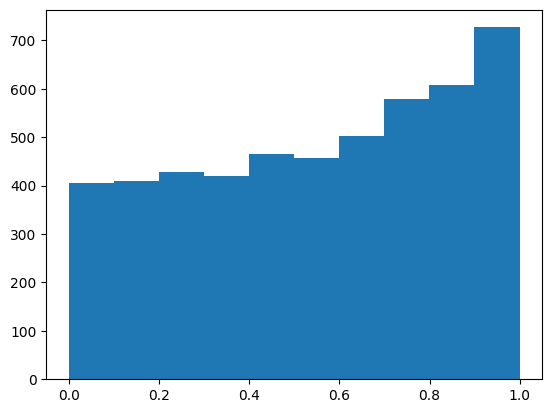

In [240]:
plt.hist(r.flatten())